In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
keras.layers.Dense(10, activation="relu", kernel_initializer="he_normal")

In [4]:
he_avg_init = keras.initializers.VarianceScaling(scale=2., mode="fan_avg", distribution="uniform")
keras.layers.Dense(10, activation="sigmoid", kernel_initializer=he_avg_init)

In [6]:
# keras.layers.Dense(300, kernel_initializer="he_nomal")
# keras.layers.LeakyRelu()

# keras.layers.Dense(300, kernel_initializer="he_nomal")
# keras.layers.PReKu()

In [8]:
# keras.layers.Dense(10, activation="selu", kernel_initializer="lecun_normal")

In [9]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
batch_normalization_1 (Batch (None, 300)               1200      
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               400       
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1

In [11]:
bn1 = model.layers[1]
[(var.name, var.trainable) for var in bn1.variables]

[('batch_normalization/gamma:0', True),
 ('batch_normalization/beta:0', True),
 ('batch_normalization/moving_mean:0', False),
 ('batch_normalization/moving_variance:0', False)]

In [12]:
model.layers[1].updates

C:\Users\domes\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1402: UserWarning: `layer.updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`layer.updates` will be removed in a future version. '


[]

In [15]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.BatchNormalization(),
    keras.layers.Dense(300, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(100, use_bias=False),
    keras.layers.BatchNormalization(),
    keras.layers.Activation("relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [16]:
# optimizer = keras.optimizers.SGD(clipvalue=1.0)
# optimizer = keras.optimizers.SGD(clipnorm=1.0)

# Transfer Learning

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [4]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
def split_dataset(X, y):
    y_5_or_6 = (y == 5) | (y == 6) # sandals or shirts
    y_A = y[~y_5_or_6]
    y_A[y_A > 6] -= 2 # class indices 7, 8, 9 should be moved to 5, 6, 7
    y_B = (y[y_5_or_6] == 6).astype(np.float32) # binary classification task: is it a shirt (class 6)?
    return ((X[~y_5_or_6], y_A),
            (X[y_5_or_6], y_B))

(X_train_A, y_train_A), (X_train_B, y_train_B) = split_dataset(X_train, y_train)
(X_valid_A, y_valid_A), (X_valid_B, y_valid_B) = split_dataset(X_valid, y_valid)
(X_test_A, y_test_A), (X_test_B, y_test_B) = split_dataset(X_test, y_test)
X_train_B = X_train_B[:200]
y_train_B = y_train_B[:200]

tf.random.set_seed(42)
np.random.seed(42)

model_A = keras.models.Sequential()
model_A.add(keras.layers.Flatten(input_shape=[28, 28]))
for n_hidden in (300, 100, 50, 50, 50):
    model_A.add(keras.layers.Dense(n_hidden, activation="selu"))
model_A.add(keras.layers.Dense(8, activation="softmax"))

model_A.compile(loss="sparse_categorical_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_A.fit(X_train_A, y_train_A, epochs=20,
                    validation_data=(X_valid_A, y_valid_A))

Epoch 1/20
1375/1375 [==============================] - 3s 2ms/step - loss: 0.9248 - accuracy: 0.6994 - val_loss: 0.3895 - val_accuracy: 0.8665
Epoch 2/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3651 - accuracy: 0.8745 - val_loss: 0.3287 - val_accuracy: 0.8824
Epoch 3/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3182 - accuracy: 0.8895 - val_loss: 0.3014 - val_accuracy: 0.8994
Epoch 4/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.3049 - accuracy: 0.8956 - val_loss: 0.2894 - val_accuracy: 0.9021
Epoch 5/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2804 - accuracy: 0.9026 - val_loss: 0.2775 - val_accuracy: 0.9061
Epoch 6/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2701 - accuracy: 0.9076 - val_loss: 0.2735 - val_accuracy: 0.9063
Epoch 7/20
1375/1375 [==============================] - 2s 2ms/step - loss: 0.2626 - accuracy: 0.9096 - val_loss: 0.2721 - val_accuracy:

In [6]:
model_A.save("my_model_A.h5")

In [7]:
model_B = keras.models.Sequential()
model_B.add(keras.layers.Flatten(input_shape=[28, 28]))

for n_hidden in (300, 100, 50, 50, 50):
    model_B.add(keras.layers.Dense(n_hidden, activation="selu"))
model_B.add(keras.layers.Dense(1, activation="sigmoid"))

model_B.compile(loss="binary_crossentropy",
                optimizer=keras.optimizers.SGD(lr=1e-3),
                metrics=["accuracy"])

history = model_B.fit(X_train_B, y_train_B, epochs=20,
                      validation_data=(X_valid_B, y_valid_B))

Epoch 1/20
7/7 [==============================] - 0s 31ms/step - loss: 1.0360 - accuracy: 0.4975 - val_loss: 0.6314 - val_accuracy: 0.6004
Epoch 2/20
7/7 [==============================] - 0s 10ms/step - loss: 0.5883 - accuracy: 0.6971 - val_loss: 0.4784 - val_accuracy: 0.8529
Epoch 3/20
7/7 [==============================] - 0s 12ms/step - loss: 0.4380 - accuracy: 0.8854 - val_loss: 0.4102 - val_accuracy: 0.8945
Epoch 4/20
7/7 [==============================] - 0s 11ms/step - loss: 0.4021 - accuracy: 0.8712 - val_loss: 0.3647 - val_accuracy: 0.9178
Epoch 5/20
7/7 [==============================] - 0s 10ms/step - loss: 0.3361 - accuracy: 0.9348 - val_loss: 0.3300 - val_accuracy: 0.9320
Epoch 6/20
7/7 [==============================] - 0s 11ms/step - loss: 0.3113 - accuracy: 0.9233 - val_loss: 0.3019 - val_accuracy: 0.9402
Epoch 7/20
7/7 [==============================] - 0s 12ms/step - loss: 0.2817 - accuracy: 0.9299 - val_loss: 0.2804 - val_accuracy: 0.9422
Epoch 8/20
7/7 [===========

In [8]:
model_A = keras.models.load_model("my_model_A.h5")
model_B_on_A = keras.models.Sequential(model_A.layers[:-1])
model_B_on_A.add(keras.layers.Dense(1, activation="sigmoid"))

In [9]:
model_A_clone = keras.models.clone_model(model_A)
model_A_clone.set_weights(model_A.get_weights())

In [10]:
for layer in model_B_on_A.layers[:-1]:
    layer.trainable = False

model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=["accuracy"])

In [11]:
history = model_B_on_A.fit(X_train_B, y_train_B, epochs=4,
                          validation_data=(X_valid_B, y_valid_B))

for layer in model_B_on_A.layers[:-1]:
    layer.trainable = True

model_B_on_A.compile(loss="binary_crossentropy",
                    optimizer=keras.optimizers.SGD(lr=1e-3),
                    metrics=["accuracy"])

history = model_B_on_A.fit(X_train_B, y_train_B, epochs=16,
                          validation_data=(X_valid_B, y_valid_B))

Epoch 1/4
7/7 [==============================] - 0s 28ms/step - loss: 0.6170 - accuracy: 0.6184 - val_loss: 0.5860 - val_accuracy: 0.6318
Epoch 2/4
7/7 [==============================] - 0s 10ms/step - loss: 0.5562 - accuracy: 0.6583 - val_loss: 0.5482 - val_accuracy: 0.6704
Epoch 3/4
7/7 [==============================] - 0s 11ms/step - loss: 0.4902 - accuracy: 0.7509 - val_loss: 0.5160 - val_accuracy: 0.7069
Epoch 4/4
7/7 [==============================] - 0s 10ms/step - loss: 0.4903 - accuracy: 0.7405 - val_loss: 0.4871 - val_accuracy: 0.7292
Epoch 1/16
7/7 [==============================] - 0s 26ms/step - loss: 0.4387 - accuracy: 0.7774 - val_loss: 0.3469 - val_accuracy: 0.8631
Epoch 2/16
7/7 [==============================] - 0s 10ms/step - loss: 0.2976 - accuracy: 0.9143 - val_loss: 0.2609 - val_accuracy: 0.9249
Epoch 3/16
7/7 [==============================] - 0s 9ms/step - loss: 0.2036 - accuracy: 0.9777 - val_loss: 0.2115 - val_accuracy: 0.9554
Epoch 4/16
7/7 [================

In [12]:
model_B_on_A.evaluate(X_test_B, y_test_B)

63/63 [==============================] - 0s 1ms/step - loss: 0.0683 - accuracy: 0.9930


[0.06832191348075867, 0.9929999709129333]

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# optimizer = keras.optimizers.SGD(lr=0.01, decay=1e-4)

In [3]:
def exponential_decay_fn(epochs):
    return 0.01 * 0.1 **(epochs / 20)

In [4]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epochs):
        return lr0 * 0.1 **(epochs / s)
    return exponential_decay_fn

In [5]:
exponential_decay_fn = exponential_decay(lr0=0.01, s=20)

In [6]:
lr_scheduler = keras.callbacks.LearningRateScheduler(exponential_decay_fn)

'''
history = model.fit(X_train, y_train, epochs=n_epochs,
                   validation_data(X_valid, y_valid),
                   callbacks=[lr_scheduler])
'''

'\nhistory = model.fit(X_train, y_train, epochs=n_epochs,\n                   validation_data(X_valid, y_valid),\n                   callbacks=[lr_scheduler])\n'

In [7]:
def exponential_decay_fn(epoch, lr):
    return lr * 0.1 ** (1/20)

In [8]:
def piecewise_constant_fn(epoch):
    if epoch < 5:
        return 0.01
    elif epoch < 15:
        return 0.005
    else:
        return 0.001

In [10]:
lr_scheduler = keras.callbacks.ReduceLROnPlateau(factor=0.5, patience=5)

In [11]:
'''
s = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size=32)
learning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)
optimizer = keras.optimizers.SGD(learning_rate)
'''

'\ns = 20 * len(X_train) // 32 # number of steps in 20 epochs (batch size=32)\nlearning_rate = keras.optimizers.schedules.ExponentialDecay(0.01, s, 0.1)\noptimizer = keras.optimizers.SGD(learning_rate)\n'

In [12]:
K = keras.backend

class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iterations = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
        
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
    
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

In [13]:
layer = keras.layers.Dense(100, activation='elu',
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))

In [14]:
from functools import partial

In [16]:
RegularizedDense = partial(keras.layers.Dense,
                          activation="elu",
                          kernel_initializer="he_normal",
                          kernel_regularizer=keras.regularizers.l2(0.01))

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    RegularizedDense(300),
    RegularizedDense(100),
    RegularizedDense(10, activation="softmax", kernel_initializer='glorot_uniform')
])

In [17]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(300, activation="elu", kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(100, activation="elu", kernel_initializer='he_normal'),
    keras.layers.Dropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")    
])

In [18]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full / 255.0
X_test = X_test / 255.0
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

pixel_means = X_train.mean(axis=0, keepdims=True)
pixel_stds = X_train.std(axis=0, keepdims=True)
X_train_scaled = (X_train - pixel_means) / pixel_stds
X_valid_scaled = (X_valid - pixel_means) / pixel_stds
X_test_scaled = (X_test - pixel_means) / pixel_stds

In [19]:
tf.random.set_seed(42)
np.random.seed(42)

In [20]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(300, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(100, activation="selu", kernel_initializer="lecun_normal"),
    keras.layers.AlphaDropout(rate=0.2),
    keras.layers.Dense(10, activation="softmax")
])

optimizer = keras.optimizers.SGD(lr=0.01, momentum=0.9, nesterov=True)
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
n_epochs = 20

history = model.fit(X_train_scaled, y_train, epochs=n_epochs,
                    validation_data=(X_valid_scaled, y_valid))

Epoch 1/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.8023 - accuracy: 0.7146 - val_loss: 0.5778 - val_accuracy: 0.8446
Epoch 2/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5662 - accuracy: 0.7904 - val_loss: 0.5146 - val_accuracy: 0.8528
Epoch 3/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5260 - accuracy: 0.8062 - val_loss: 0.4878 - val_accuracy: 0.8604
Epoch 4/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5125 - accuracy: 0.8098 - val_loss: 0.4810 - val_accuracy: 0.8576
Epoch 5/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.5074 - accuracy: 0.8126 - val_loss: 0.4250 - val_accuracy: 0.8686
Epoch 6/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4789 - accuracy: 0.8201 - val_loss: 0.4600 - val_accuracy: 0.8640
Epoch 7/20
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4721 - accuracy: 0.8273 - val_loss: 0.4672 - val_accuracy:

In [21]:
tf.random.set_seed(42)
np.random.seed(42)

In [22]:
y_probas = np.stack([model(X_test_scaled, training=True) for sample in range(100)])
y_proba = y_probas.mean(axis=0)
y_std = y_probas.std(axis=0)

In [25]:
y_probas.shape

(100, 10000, 10)

In [26]:
X_test_scaled.shape

(10000, 28, 28)

In [29]:
np.round(model.predict(X_test_scaled[:1]), 4)

array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.0012,
        0.    , 0.9987]], dtype=float32)

In [31]:
np.round(y_probas[:, :1], 2)

array([[[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.72, 0.  , 0.27]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.65, 0.  , 0.33]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.  , 0.  , 0.98]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.3 , 0.  , 0.68]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.26, 0.  , 0.74]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.48, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.11, 0.  , 0.38, 0.  , 0.51]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.08, 0.  , 0.07, 0.  , 0.85]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.06, 0.  , 0.03, 0.  , 0.9 ]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.05, 0.  , 0.95]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.38, 0.  , 0.44]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.2 , 0.  , 0.62]],

       [[0.  , 0.  , 0.  , 0.  , 0.  , 0.22, 0.  , 0.26, 0.  , 0

In [32]:
np.round(y_proba[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.09, 0.  , 0.16, 0.  , 0.75]],
      dtype=float32)

In [33]:
np.round(y_std[:1], 2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.17, 0.  , 0.17, 0.  , 0.25]],
      dtype=float32)

In [36]:
model.evaluate(X_test_scaled, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.4801 - accuracy: 0.8610


[0.4801124036312103, 0.8610000014305115]

In [37]:
y_pred = np.argmax(y_proba, axis=1)

accuracy = np.sum(y_pred == y_test) / len(y_test)
accuracy

0.8642

In [38]:
class MCDropout(keras.layers.Dropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [39]:
keras.layers.Dense(100, activation='elu', kernel_initializer='he_normal',
                  kernel_constraint=keras.constraints.max_norm(1.))

# Exercises

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [3]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [4]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="elu",
                                kernel_initializer="he_normal"))

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.cifar10.load_data()

170500096/170498071 [==============================] - 23s 0us/step


In [20]:
X_train = X_train_full[5000:]
y_train = y_train_full[5000:]
X_valid = X_train_full[:5000]
y_valid = y_train_full[:5000]

In [9]:
model.add(keras.layers.Dense(10, activation="softmax"))

In [10]:
optimizer = keras.optimizers.Nadam(lr=5e-5)

In [11]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [12]:
import os

early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_model.h5", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [13]:
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [21]:
model.fit(X_train, y_train, epochs=100,
         validation_data=(X_valid, y_valid),
         callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 10s 7ms/step - loss: 2.0666 - accuracy: 0.2446 - val_loss: 1.9982 - val_accuracy: 0.2792
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.9495 - accuracy: 0.2870 - val_loss: 1.9632 - val_accuracy: 0.2656
Epoch 3/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.8725 - accuracy: 0.3191 - val_loss: 1.9206 - val_accuracy: 0.2910
Epoch 4/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.8054 - accuracy: 0.3441 - val_loss: 1.9299 - val_accuracy: 0.3042
Epoch 5/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.7533 - accuracy: 0.3631 - val_loss: 1.7661 - val_accuracy: 0.3578
Epoch 6/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.7109 - accuracy: 0.3824 - val_loss: 1.7196 - val_accuracy: 0.3824
Epoch 7/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.6716 - accuracy: 0.3957 - val_loss: 1.6776

1407/1407 [==============================] - 14s 10ms/step - loss: 1.1299 - accuracy: 0.5926 - val_loss: 1.5808 - val_accuracy: 0.4662
Epoch 57/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1225 - accuracy: 0.5955 - val_loss: 1.5814 - val_accuracy: 0.4738
Epoch 58/100
1407/1407 [==============================] - 14s 10ms/step - loss: 1.1200 - accuracy: 0.5973 - val_loss: 1.5721 - val_accuracy: 0.4776
Epoch 59/100
1407/1407 [==============================] - 13s 10ms/step - loss: 1.1149 - accuracy: 0.5993 - val_loss: 1.5751 - val_accuracy: 0.4800
Epoch 60/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.1051 - accuracy: 0.6009 - val_loss: 1.6095 - val_accuracy: 0.4676
Epoch 61/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.0951 - accuracy: 0.6047 - val_loss: 1.6214 - val_accuracy: 0.4668


In [24]:
model = keras.models.load_model("my_cifar10_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5152 - accuracy: 0.4734


[1.5151920318603516, 0.4733999967575073]

In [25]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [27]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))
model.add(keras.layers.BatchNormalization())

for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer="he_normal"))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation("elu"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [28]:
optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [29]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_bn_model.h5", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_bn_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [30]:
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [31]:
model.fit(X_train, y_train, epochs=100,
         validation_data=(X_valid, y_valid),
         callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 23s 12ms/step - loss: 1.9777 - accuracy: 0.2938 - val_loss: 1.6843 - val_accuracy: 0.4010
Epoch 2/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6778 - accuracy: 0.4021 - val_loss: 1.5826 - val_accuracy: 0.4324
Epoch 3/100
1407/1407 [==============================] - 19s 14ms/step - loss: 1.6117 - accuracy: 0.4305 - val_loss: 1.5100 - val_accuracy: 0.4588
Epoch 4/100
1407/1407 [==============================] - 20s 14ms/step - loss: 1.5460 - accuracy: 0.4474 - val_loss: 1.5109 - val_accuracy: 0.4590
Epoch 5/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.5005 - accuracy: 0.4670 - val_loss: 1.4389 - val_accuracy: 0.4898
Epoch 6/100
1407/1407 [==============================] - 21s 15ms/step - loss: 1.4620 - accuracy: 0.4814 - val_loss: 1.4470 - val_accuracy: 0.4910
Epoch 7/100
1407/1407 [==============================] - 23s 16ms/step - loss: 1.4262 - accuracy: 0.4922 - val_loss: 1

In [32]:
model = keras.models.load_model("my_cifar10_bn_model.h5")
model.evaluate(X_valid, y_valid)

157/157 [==============================] - 1s 2ms/step - loss: 1.3130 - accuracy: 0.5408: 0s - loss: 1.3136 - accuracy: 0.53


[1.3129956722259521, 0.5407999753952026]

In [33]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [34]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.Dense(10, activation="softmax"))

In [35]:
optimizer = keras.optimizers.Nadam(lr=7e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [36]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_selu_model.h5", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_selu_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [37]:
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [38]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [40]:
model.fit(X_train_scaled, y_train, epochs=100,
         validation_data=(X_valid_scaled, y_valid),
         callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 13s 8ms/step - loss: 2.0655 - accuracy: 0.2632 - val_loss: 1.8620 - val_accuracy: 0.3352
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7475 - accuracy: 0.3760 - val_loss: 1.7397 - val_accuracy: 0.3904
Epoch 3/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.6335 - accuracy: 0.4254 - val_loss: 1.7237 - val_accuracy: 0.3930
Epoch 4/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.5572 - accuracy: 0.4494 - val_loss: 1.6405 - val_accuracy: 0.4314
Epoch 5/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.4925 - accuracy: 0.4707 - val_loss: 1.5681 - val_accuracy: 0.4496
Epoch 6/100
1407/1407 [==============================] - 13s 9ms/step - loss: 1.4340 - accuracy: 0.4973 - val_loss: 1.5565 - val_accuracy: 0.4598
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3860 - accuracy: 0.5175 - val_loss: 1.5250 -

In [41]:
model = keras.models.load_model("my_cifar10_selu_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4659 - accuracy: 0.5114


[1.465861439704895, 0.5113999843597412]

In [42]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [43]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [44]:
optimizer = keras.optimizers.Nadam(lr=5e-4)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

In [45]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint("my_cifar10_alpha_dropout_model.h5", save_best_only=True)

run_index = 1 # increment every time you train the model
run_logdir = os.path.join(os.curdir, "my_cifar10_logs", "run_alpha_dropout_{:03d}".format(run_index))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [46]:
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb]

In [47]:
X_means = X_train.mean(axis=0)
X_stds = X_train.std(axis=0)

X_train_scaled = (X_train - X_means) / X_stds
X_valid_scaled = (X_valid - X_means) / X_stds
X_test_scaled = (X_test - X_means) / X_stds

In [48]:
model.fit(X_train_scaled, y_train, epochs=100,
          validation_data=(X_valid_scaled, y_valid),
          callbacks=callbacks)

Epoch 1/100
1407/1407 [==============================] - 12s 7ms/step - loss: 2.0662 - accuracy: 0.2790 - val_loss: 1.7548 - val_accuracy: 0.3746
Epoch 2/100
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6735 - accuracy: 0.4091 - val_loss: 1.7257 - val_accuracy: 0.3886
Epoch 3/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5859 - accuracy: 0.4471 - val_loss: 1.6619 - val_accuracy: 0.4228
Epoch 4/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.5073 - accuracy: 0.4702 - val_loss: 1.5918 - val_accuracy: 0.4500
Epoch 5/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.4431 - accuracy: 0.4947 - val_loss: 1.5637 - val_accuracy: 0.4756
Epoch 6/100
1407/1407 [==============================] - 12s 8ms/step - loss: 1.3919 - accuracy: 0.5115 - val_loss: 1.5364 - val_accuracy: 0.4748
Epoch 7/100
1407/1407 [==============================] - 12s 9ms/step - loss: 1.3476 - accuracy: 0.5302 - val_loss: 1.6293 -

In [49]:
model = keras.models.load_model("my_cifar10_alpha_dropout_model.h5")
model.evaluate(X_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5108 - accuracy: 0.4954


[1.5108253955841064, 0.49540001153945923]

In [50]:
class MCAlphaDropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training=True)

In [51]:
mc_model = keras.models.Sequential([
    MCAlphaDropout(layer.rate) if isinstance(layer, keras.layers.AlphaDropout) else layer for layer in model.layers
])

In [52]:
def mc_dropout_predict_probas(mc_model, X, n_samples=10):
    Y_probas = [mc_model.predict(X) for sample in range(n_samples)]
    return np.mean(Y_probas, axis=0)

def mc_dropout_predict_classes(mc_model, X, n_samples=10):
    Y_probas = mc_dropout_predict_probas(mc_model, X, n_samples)
    return np.argmax(Y_probas, axis=1)

In [53]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [54]:
y_pred = mc_dropout_predict_classes(mc_model, X_valid_scaled)
accuracy = np.mean(y_pred == y_valid[:, 0])
accuracy

0.4974

In [55]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [56]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [57]:
optimizer = keras.optimizers.SGD(lr=1e-3)
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=optimizer,
             metrics=["accuracy"])

352/352 [==============================] - 3s 8ms/step - loss: nan - accuracy: 0.1245


[1e-05, 9.999868, 2.619798421859741, 3.937614474977766]

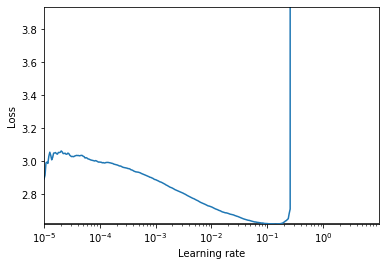

In [60]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

def find_learning_rate(model, X, y, epochs=1, batch_size=32, min_rate=10**-5, max_rate=10):
    init_weights = model.get_weights()
    iterations = len(X) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations)
    init_lr = K.get_value(model.optimizer.lr)
    K.set_value(model.optimizer.lr, min_rate)
    exp_lr = ExponentialLearningRate(factor)
    history = model.fit(X, y, epochs=epochs, batch_size=batch_size,
                        callbacks=[exp_lr])
    K.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.losses

def plot_lr_vs_loss(rates, losses):
    plt.plot(rates, losses)
    plt.gca().set_xscale('log')
    plt.hlines(min(losses), min(rates), max(rates))
    plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 2])
    plt.xlabel("Learning rate")
    plt.ylabel("Loss")
    

batch_size = 128
rates, losses = find_learning_rate(model, X_train_scaled, y_train, epochs=1,
                                  batch_size=batch_size)

plot_lr_vs_loss(rates, losses)
plt.axis([min(rates), max(rates), min(losses), (losses[0] + min(losses)) / 1.4])

In [61]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [62]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=[32, 32, 3]))

for _ in range(20):
    model.add(keras.layers.Dense(100,
                                 kernel_initializer="lecun_normal",
                                 activation="selu"))

model.add(keras.layers.AlphaDropout(rate=0.1))
model.add(keras.layers.Dense(10, activation="softmax"))

In [63]:
optimizer = keras.optimizers.SGD(lr=1e-2)
model.compile(loss="sparse_categorical_crossentropy",
              optimizer=optimizer,
              metrics=["accuracy"])

In [64]:
class OneCycleScheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate=None,
                 last_iterations=None, last_rate=None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10
        self.last_iterations = last_iterations or iterations // 10 + 1
        self.half_iteration = (iterations - self.last_iterations) // 2
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2):
        return ((rate2 - rate1) * (self.iteration - iter1)
                / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration:
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration:
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration,
                                     self.max_rate, self.start_rate)
        else:
            rate = self._interpolate(2 * self.half_iteration, self.iterations,
                                     self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        K.set_value(self.model.optimizer.lr, rate)

n_epochs = 15
onecycle = OneCycleScheduler(len(X_train_scaled) // batch_size * n_epochs, max_rate=0.05)

history = model.fit(X_train_scaled, y_train, epochs=n_epochs, batch_size=batch_size,
                   validation_data=(X_valid_scaled, y_valid),
                   callbacks=[onecycle])

Epoch 1/15
352/352 [==============================] - 4s 9ms/step - loss: 2.2259 - accuracy: 0.2363 - val_loss: 1.7972 - val_accuracy: 0.3792
Epoch 2/15
352/352 [==============================] - 3s 8ms/step - loss: 1.7821 - accuracy: 0.3706 - val_loss: 1.6632 - val_accuracy: 0.4108
Epoch 3/15
352/352 [==============================] - 3s 8ms/step - loss: 1.6381 - accuracy: 0.4194 - val_loss: 1.6363 - val_accuracy: 0.4308
Epoch 4/15
352/352 [==============================] - 3s 8ms/step - loss: 1.5439 - accuracy: 0.4504 - val_loss: 1.6249 - val_accuracy: 0.4326
Epoch 5/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4864 - accuracy: 0.4749 - val_loss: 1.6101 - val_accuracy: 0.4566
Epoch 6/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4395 - accuracy: 0.4859 - val_loss: 1.5485 - val_accuracy: 0.4676
Epoch 7/15
352/352 [==============================] - 3s 8ms/step - loss: 1.4064 - accuracy: 0.5004 - val_loss: 1.5736 - val_accuracy: 0.4540
Epoch 